# ABD Nüfus Sayımı Verileri ile Gelir Tahmini (Income Prediction)

Bu projede ABD Nüfus Sayımı (US Census) verileri kullanılarak, bireylerin gelir düzeylerinin (Income) tahmin edilmesi amaçlanmaktadır. Bu çalışma, Gözetimli Öğrenme (Supervised Learning) kapsamında, bir regresyon problemidir. Amaç, bağımsız değişkenleri (eğitim, meslek, cinsiyet, etnik köken vb.) kullanarak sürekli bir değişken olan gelir (Income) değerini tahmin etmektir.

Bu projeyle birlikte:

EDA (Keşifsel Veri Analizi),

Kategorik değişkenlerin dönüştürülmesi (Encoding),

Eksik verilerin temizlenmesi,

Regresyon modeli eğitimi,

Model değerlendirme metriklerinin (MSE, RMSE, MAE, R²) hesaplanması
konularında uygulamalı deneyim kazanacağız.

# Gerekli Kütüphaneler ve Veri Yükleme


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleme
data = pd.read_csv('/kaggle/input/us-census-demographic-data/acs2015_census_tract_data.csv')
data.head()


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [2]:
data.tail()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,...,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,...,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,...,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,...,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7
74000,72153750602,Puerto Rico,Yauco,2741,1181,1560,99.3,0.7,0.0,0.0,...,0.0,0.0,14.9,26.8,496,72.8,19.6,7.7,0.0,20.1


# EDA (Keşifsel Veri Analizi) ve Görselleştirme

**Bu aşamada veri seti hakkında genel bilgi alıyor, eksik değerleri inceliyor ve önemli değişkenlerin dağılımlarını ve korelasyonlarını görselleştiriyoruz.**

In [3]:
# Veri kümesinin genel yapısını inceleyelim
print(data.info())

print(data.describe())

# Eksik değerlerin sayısını görelim
print(data.isnull().sum().sort_values(ascending=False).head(10))





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


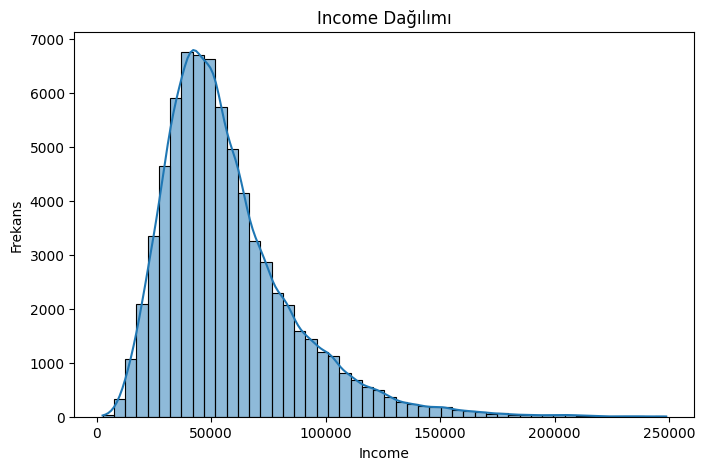

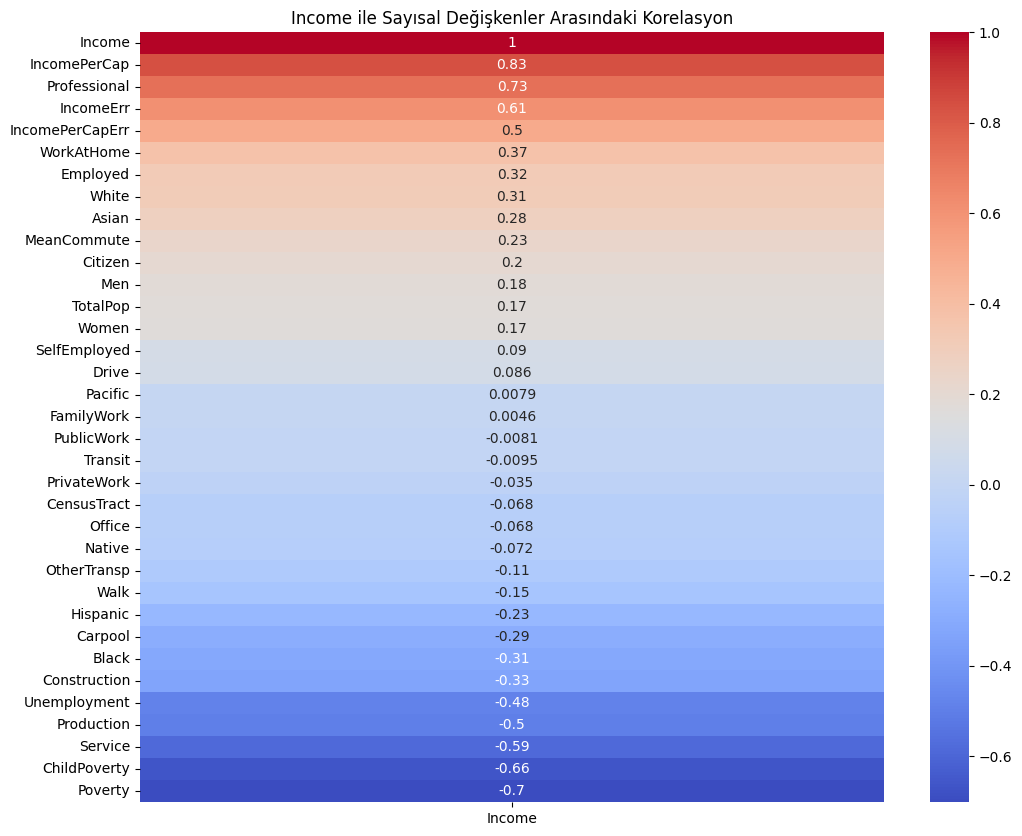

In [4]:
# Income dağılımı grafiği
plt.figure(figsize=(8,5))
sns.histplot(data['Income'], bins=50, kde=True)
plt.title('Income Dağılımı')
plt.xlabel('Income')
plt.ylabel('Frekans')
plt.show()

# Income ile diğer sayısal değişkenlerin korelasyon matrisi (sadece sayısal sütunlarla)
numeric_data = data.select_dtypes(include=[np.number])  # sadece sayısal değişkenler

plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr()[['Income']].sort_values(by='Income', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Income ile Sayısal Değişkenler Arasındaki Korelasyon')
plt.show()

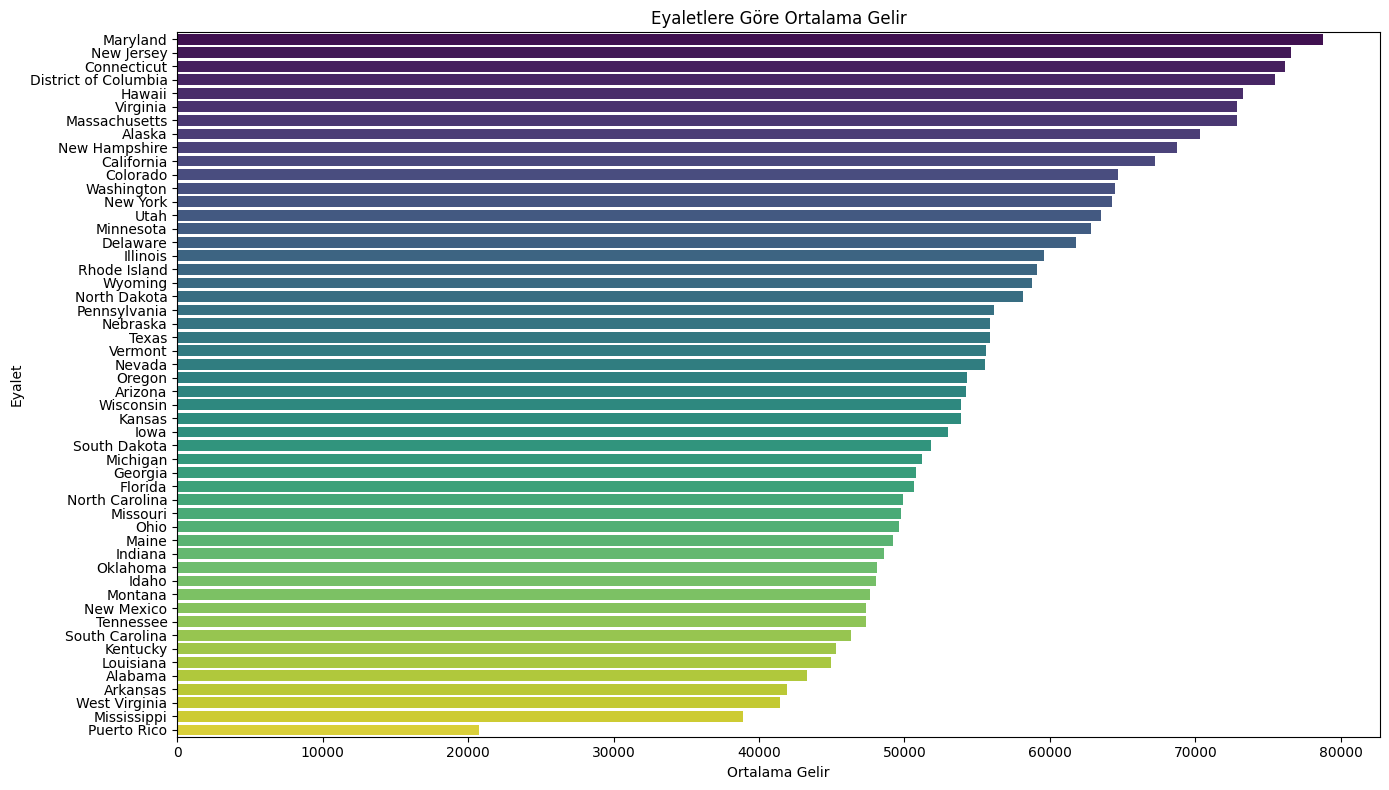

In [5]:
# State sütununa göre ortalama gelir hesaplama
state_income = data.groupby("State")["Income"].mean().sort_values(ascending=False)

# Görselleştirme
plt.figure(figsize=(14, 8))
sns.barplot(x=state_income.values, y=state_income.index, palette="viridis")
plt.title("Eyaletlere Göre Ortalama Gelir")
plt.xlabel("Ortalama Gelir")
plt.ylabel("Eyalet")
plt.tight_layout()
plt.show()


**Grafikte de gördüğümüz gibi eyaletlere göre ortalama gelirler 80.000 dolar ile 20.000 dolar arasında değişmektedir.**

# Kategorik Verilerin Encoding’i

**Modelin çalışabilmesi için "State" ve "County",  gibi kategorik değişkenleri One-hot Encoding yöntemiyle sayısal verilere çeviriyoruz.**

In [6]:
# One-Hot Encoding işlemi
data_encoded = pd.get_dummies(data, columns=['State', 'County'], drop_first=True)

# Yeni veri kümesinden örnek göster
data_encoded.head()


,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,County_Yoakum,County_Yolo,County_York,County_Young,County_Yuba,County_Yukon-Koyukuk Census Area,County_Yuma,County_Zapata,County_Zavala,County_Ziebach
0,1001020100,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1001020200,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1001020300,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,...,False,False,False,False,False,False,False,False,False,False
3,1001020400,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1001020500,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,...,False,False,False,False,False,False,False,False,False,False


 # Eksik Verilerin Temizlenmesi

**Veri setindeki eksik (NaN) değerleri temizliyoruz. 'Income' değişkeni hedef değişken olduğu için bu kolonda eksik olan satırları siliyoruz. Diğer eksik değerleri ise medyan ile dolduruyoruz.**

In [7]:
# Income kolonu eksikse satırı tamamen kaldıralım
data_encoded = data_encoded.dropna(subset=['Income'])

# Diğer eksik değerleri medyan ile dolduralım
for col in data_encoded.columns:
    if data_encoded[col].isnull().sum() > 0:
        data_encoded[col] = data_encoded[col].fillna(data_encoded[col].median())

# Eksik veri kontrolü
print("Toplam eksik veri sayısı:", data_encoded.isnull().sum().sum())


Toplam eksik veri sayısı: 0


# Modelleme (Linear Regression ile)

**Bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırıyoruz. Daha sonra train_test_split fonksiyonu ile eğitim ve test setlerine bölüp Linear Regression modelimizi eğitiyoruz.**

In [8]:
# Özellik ve hedef değişken ayrımı
y = data_encoded['Income']
X = data_encoded.drop('Income', axis=1)

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:


# Model oluşturma ve eğitme
model = LinearRegression() #Lineer regresyon kullandık
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)


# Lineer Regresyon Modeli Değerlendirme

**Eğitilen modeli çeşitli regresyon metrikleri ile değerlendiriyoruz:**

**MSE: Ortalama kare hatası**

**RMSE: Kök ortalama kare hatası**

**MAE: Ortalama mutlak hata**

**R² Score: Açıklanan varyans**

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.4f}")


MSE: 112074338.19
RMSE: 10586.52
MAE: 7524.06
R2 Score: 0.8658


In [11]:
# --- FARKLI MODELLERLE EĞİTİM VE DEĞERLENDİRME ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 4)
    })

# Sonuçları tablo halinde göster
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)
print("🔍 Model Performans Karşılaştırması:")
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.733e+11, tolerance: 4.771e+09
  model = cd_fast.enet_coordinate_descent(


🔍 Model Performans Karşılaştırması:
               Model           MSE          RMSE           MAE      R2 Score
0      Random Forest  9.381980e+07  9.686060e+03  6.737980e+03  8.877000e-01
1  Gradient Boosting  9.554241e+07  9.774580e+03  6.895720e+03  8.856000e-01
2   Lasso Regression  1.119991e+08  1.058296e+04  7.519470e+03  8.659000e-01
3   Ridge Regression  1.121043e+08  1.058793e+04  7.525620e+03  8.658000e-01
4      Decision Tree  1.990895e+08  1.410991e+04  9.799710e+03  7.617000e-01
5  Linear Regression  8.897443e+33  9.432626e+16  3.994578e+15 -1.065197e+25


**Karşılaştırmada gördüğümüz gibi Random Forest ve Gradient Boosting en iyi sonuçları vermiş.**

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller
models = [
    ("Random Forest", RandomForestRegressor(n_jobs=-1, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# 3-Fold Cross Validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Sonuçları yazdır
print("K-Fold (3 split) Cross Validation R2 Sonuçları:")
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    print(f"{name:20} | Ortalama R2: {scores.mean():.4f} | Std: {scores.std():.4f}")


K-Fold (3 split) Cross Validation R2 Sonuçları:
Random Forest        | Ortalama R2: 0.8836 | Std: 0.0021
Gradient Boosting    | Ortalama R2: 0.8829 | Std: 0.0013
Linear Regression    | Ortalama R2: 0.8638 | Std: 0.0022


# Tahmin ve Gerçek Değerleri Görselleştirme

**Test verisinde tahmin edilen ve gerçek gelir değerlerini karşılaştırmalı olarak görselleştiriyoruz. Bu grafik, modelin başarısını görsel olarak incelememizi sağlar.**

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tahminlerin doğruluğunu ölçmek için metrikler hesaplanıyor
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performans Değerlendirmesi:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.4f}")


Model Performans Değerlendirmesi:
Mean Squared Error (MSE): 95542413.59
Root Mean Squared Error (RMSE): 9774.58
Mean Absolute Error (MAE): 6895.72
R2 Score: 0.8856


**Gerçek ve Tahmin Değerlerini Karşılaştırma Grafiği ve Isı Haritasını oluşturalım**

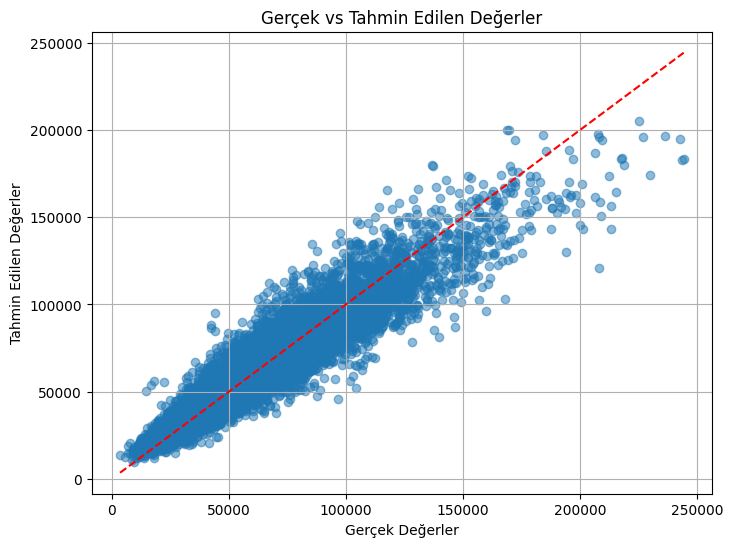

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Değerler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # y=x doğrusu
plt.grid(True)
plt.show()




# 📌 SONUÇ ve DEĞERLENDİRME

**Proje Özeti**
Bu projede, ABD Nüfus Sayımı Demografik Veri Seti kullanılarak bir bölgenin ortalama gelir (Income) tahmin edilmeye çalışıldı. Birden fazla regresyon modeli eğitildi ve modellerin performansları çeşitli hata metrikleri ve R² skoru ile karşılaştırıldı.

**Amaç**
Verideki demografik ve sosyal değişkenleri kullanarak, ortalama geliri yüksek doğrulukla tahmin edebilen en uygun regresyon modelini bulmak.

**Kullanılan Süreçler**
Veri Yükleme ve Keşif:
Veri seti incelendi, veri tipleri ve eksik değerler kontrol edildi.

**Veri Ön İşleme:**
Kategorik değişkenlere One Hot Encoding uygulandı, eksik veriler temizlendi.

**Model Eğitimi ve Değerlendirme:**
Linear Regression, Ridge,Decision Tree, Random Forest ve Gradient Boosting modelleri eğitildi.
Performansları MSE, RMSE, MAE ve R² skorları kullanılarak karşılaştırıldı.
Ayrıca 3-fold cross validation ile modellerin genel performansı ölçüldü.


**Değerlendirme**

Random Forest ve Gradient Boosting modelleri, karmaşık yapıyı en iyi yakalayan modeller olarak öne çıktı.

Ridge ve Lasso regresyon modelleri makul sonuçlar verdi fakat ansambl modellerin gerisinde kaldı.

Tek başına Decision Tree performansı diğer modellere göre daha düşük.

Linear Regression modelinin beklenmedik kötü performansı, veri ölçeklendirme veya çoklu doğrusal bağlantılar gibi veri problemlerinden kaynaklanabilir.

**Sonuç**

Ansambl yöntemlerin kullanılması, gelir tahmininde doğrusal modellere göre önemli performans avantajları sağladı. Bu nedenle, sonraki aşamalarda Random Forest modeli tercih edilerek hiperparametre optimizasyonu ve daha gelişmiş veri ön işleme teknikleri ile model iyileştirmesi hedeflenmektedir.

**📈 Yorumlar:**

**R² Skoru olan 0.8658, modelin hedef değişken olan Income'un varyansının yaklaşık %86’sını açıklayabildiğini göstermektedir. Bu da oldukça yüksek bir başarı oranıdır.**

**RMSE ve MAE değerleri, hata büyüklüğünün kabul edilebilir düzeyde olduğunu gösteriyor.**

**Model, özellikle büyük veri setlerinde hızlı ve etkili bir şekilde gelir tahmini yapmak için uygun bir temel sunmaktadır.**

**Ek olarak, daha karmaşık modeller (Random Forest, XGBoost vb.) kullanılarak performans daha da artırılabilir.**